In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

In [2]:
df = pd.read_csv('poverty.csv')
df.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [3]:
ViolCrime_sum = df.ViolCrime.sum()
ViolCrime_sum

400.60000000000002

In [4]:
ViolCrime_count = df.shape[0]
ViolCrime_count

51

In [5]:
ViolCrime_mean = ViolCrime_sum / ViolCrime_count
ViolCrime_mean

7.8549019607843142

In [6]:
ViolCrime_sorted = df.ViolCrime.sort_values()
ViolCrime_median = (ViolCrime_count + 1) // 2
ViolCrime_sorted.iloc[ViolCrime_median]

7.2000000000000002

In [7]:
df.ViolCrime.value_counts().index[0]

1.8

In [8]:
ViolCrime_square_difference = np.sum(np.square(df['ViolCrime'] - ViolCrime_mean))
ViolCrime_square_difference

3973.0862745098034

In [9]:
ViolCrime_variance = ViolCrime_square_difference / (ViolCrime_count - 1)
ViolCrime_variance

79.461725490196073

In [10]:
ViolCrime_std = np.sqrt(ViolCrime_variance)
ViolCrime_std

8.9141306637381117

I want to study correlation between crimes and a person age between 18-19.

x = person age between 18-19

y = crimes

In [11]:
Brth18to19_mean = df['Brth18to19'].mean()
ViolCrime_mean = df['ViolCrime'].mean()

In [12]:
variation_difference_sum = np.sum((df['Brth18to19'] - Brth18to19_mean) * (df['ViolCrime'] - ViolCrime_mean))
variation_difference_sum

4040.1950980392153

In [13]:
covariance_age_crimes = variation_difference_sum / (ViolCrime_count - 1)
covariance_age_crimes

80.803901960784302

In [14]:
crimes_std = df['ViolCrime'].std()
Brth18to19_std = df['Brth18to19'].std()

In [15]:
covariance_age_crimes/(crimes_std * Brth18to19_std)

0.47770375724268116

The correlation is 0.47770375724268116

we can say, if crime increase by 1, 0.47 chances caused by age 18-19.

In [16]:
df.corr()

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
PovPct,1.000000,0.730293,0.649660,0.469564,0.703285
Brth15to17,0.730293,1.000000,0.942449,0.640274,0.978826
Brth18to19,0.649660,0.942449,1.000000,0.477704,0.988975
ViolCrime,0.469564,0.640274,0.477704,1.000000,0.557937
TeenBrth,0.703285,0.978826,0.988975,0.557937,1.000000


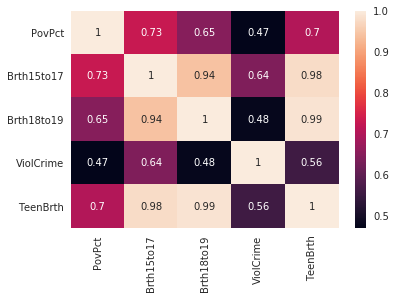

In [17]:
sns.heatmap(df.corr(),annot=True)
plt.show()